<a href="https://colab.research.google.com/github/MOHD-SAMEER-MANSOORI/Gold_price_prediction/blob/main/Gold_Price_Prediction_using_random_forest_regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Libraries

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

##Data Collection and Processing

In [295]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/gld_price_data.csv')

In [296]:
# print first 5 rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [297]:
# print last 5 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [298]:
# number of rows and columns
df.shape

(2290, 6)

In [299]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [300]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [301]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [302]:
#convert date into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by year and calculate the mean price for each year

df['Year'] = df['Date'].dt.year
yearly_data = df.groupby('Year')['EUR/USD'].mean()

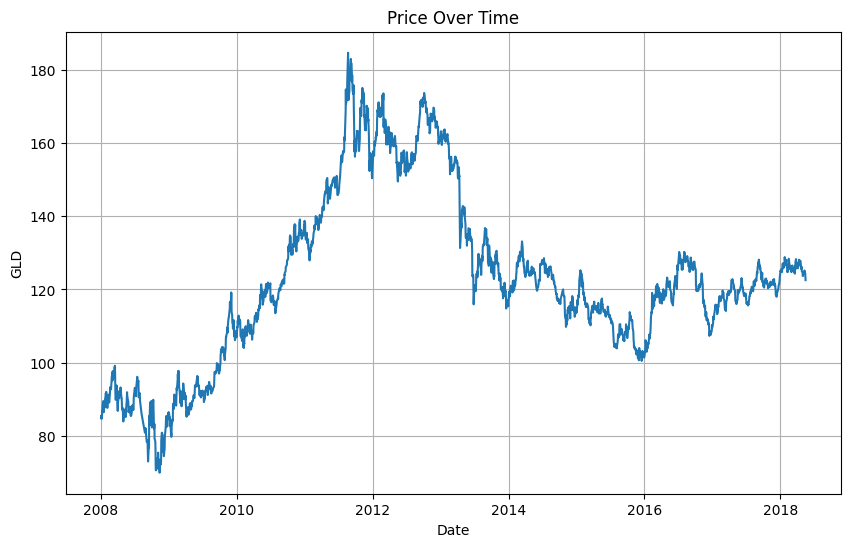

In [303]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['GLD'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('GLD')
plt.grid()
plt.show()

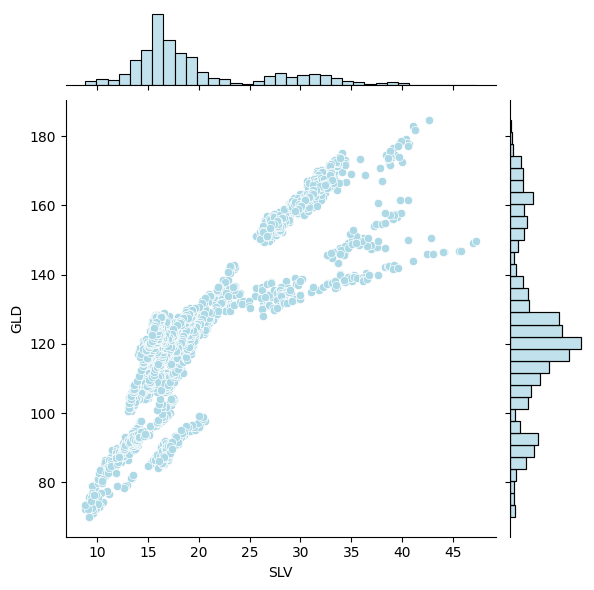

In [304]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'lightblue')

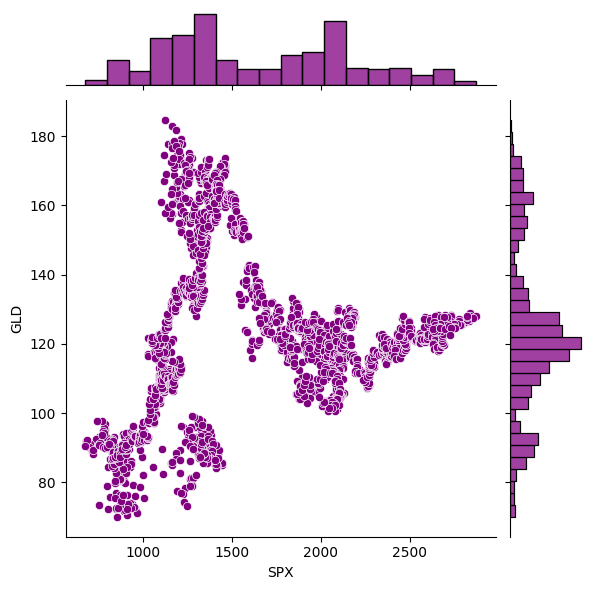

In [305]:
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'purple')

Correlation:
1. Positive Correlation
2. Negative Correlation

<ipython-input-306-fea59c2e27c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

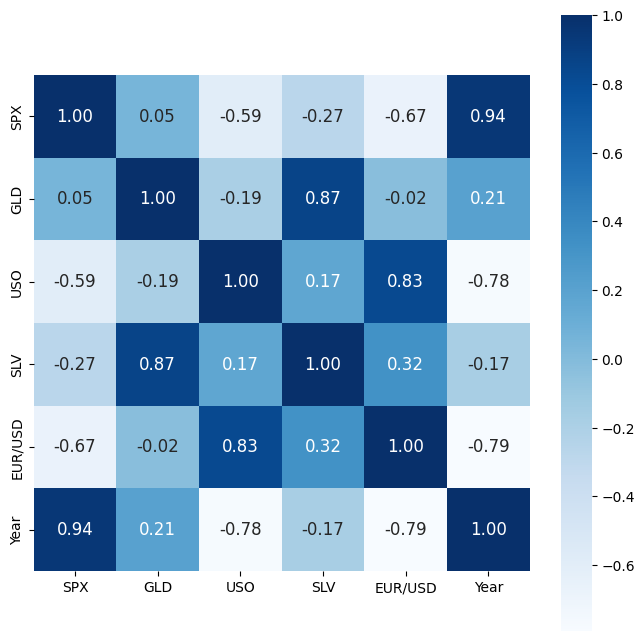

In [306]:
correlation=df.corr()
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':12}, cmap='Blues')

In [307]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Name: GLD, dtype: float64


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


<ipython-input-308-595d02f23adf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


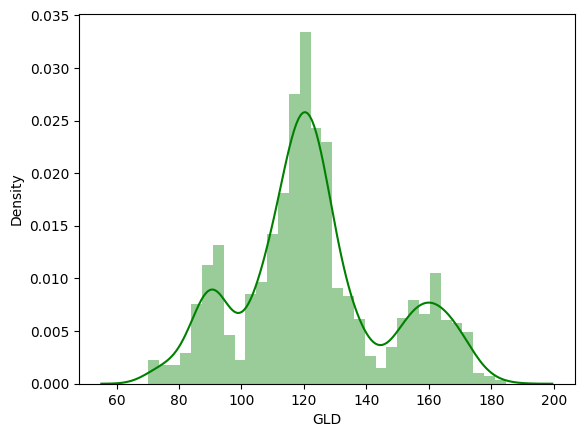

In [308]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

##Splitting the Features and Target

In [309]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [310]:
print(X)

              SPX        USO      SLV   EUR/USD  Year
0     1447.160034  78.470001  15.1800  1.471692  2008
1     1447.160034  78.370003  15.2850  1.474491  2008
2     1411.630005  77.309998  15.1670  1.475492  2008
3     1416.180054  75.500000  15.0530  1.468299  2008
4     1390.189941  76.059998  15.5900  1.557099  2008
...           ...        ...      ...       ...   ...
2285  2671.919922  14.060000  15.5100  1.186789  2018
2286  2697.790039  14.370000  15.5300  1.184722  2018
2287  2723.070068  14.410000  15.7400  1.191753  2018
2288  2730.129883  14.380000  15.5600  1.193118  2018
2289  2725.780029  14.405800  15.4542  1.182033  2018

[2290 rows x 5 columns]


In [311]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


##Splitting into Training data and Test Data

In [312]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

##Training the Random forest model on the Training set

In [313]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

In [314]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

Model Evaluation

In [315]:
# prediction on Test Data
y_pred = regressor.predict(X_test)

In [316]:
print(y_pred)

[168.48869922  82.39089976 116.23670029 127.52000094 120.46760089
 154.6615979  150.17459908 126.18890043 117.62129846 125.96120102
 116.23200145 171.63710114 142.44559908 167.70099819 115.18500048
 117.49450059 138.79430253 170.16630043 159.71170265 156.93219987
 155.16290028 122.78069995 176.5723992  157.38280396 125.29710039
  93.70549997  77.27340011 120.11259991 119.09289977 167.44999928
  88.16390029 125.39510011  91.04710087 117.62910007 121.01849953
 135.7062011  115.46980078 114.62030113 148.34849948 107.35510071
 105.76110284  86.94019759 126.47390071 117.9198999  155.16429889
 119.9621997  108.36669991 108.02339803  93.22190052 127.02419812
  75.09310018 113.71459987 120.42389988 111.34889884 118.76259874
 120.36409949 159.55770058 166.97160082 146.93069626  85.9556988
  94.48120023  86.95359908  90.36710008 118.99510091 126.42790043
 127.74870056 170.67719906 122.24219951 117.98309863  98.19600032
 168.34210178 143.19809884 132.01890269 120.73580127 123.47429862
 119.633301

In [321]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared  : ", error_score)

R squared  :  0.9901102767829839


##Applying k-Fold Cross Validation

In [318]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.14 %
Standard Deviation: 0.26 %


##Compare the Actual Values and Predicted Values in a Plot

In [319]:
Y_test = list(Y_test)

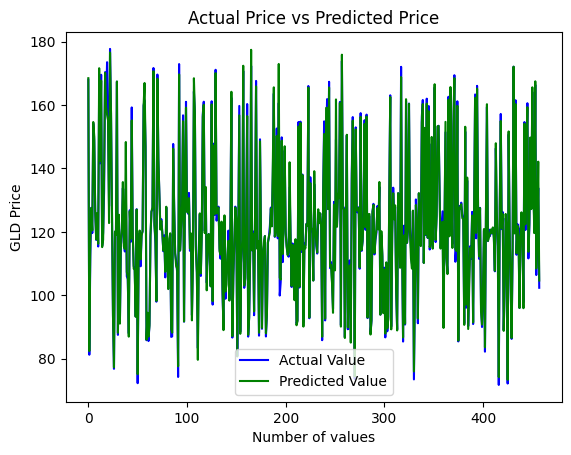

In [320]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()